In [55]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import os
os.chdir("/Users/darshmac/Documents/cdac/For DBDA/Advance Analytics/Datasets")

In [70]:
dia = pd.read_csv("diamonds.csv")
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [43]:
boston = pd.read_csv("Boston.csv")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [44]:
X = boston.drop('medv',axis=1)
y = boston['medv']

In [45]:
kfold = KFold(n_splits=5,shuffle=True,random_state=23)

In [46]:
lr = LinearRegression()

In [47]:
result = cross_val_score(lr,X,y,cv=kfold)

In [48]:
print("R2:",np.mean(result))#mean of result is important

R2: 0.7185747399235821


In [61]:
alphas = np.linspace(0.001,15,200)
scores=[]
for v in alphas:
    ridge = Ridge(alpha=v)
    scr = cross_val_score(ridge,X,y,cv=kfold)
    scores.append(np.mean(scr))
    #print("Alpha=",v,"R2 =",scr)

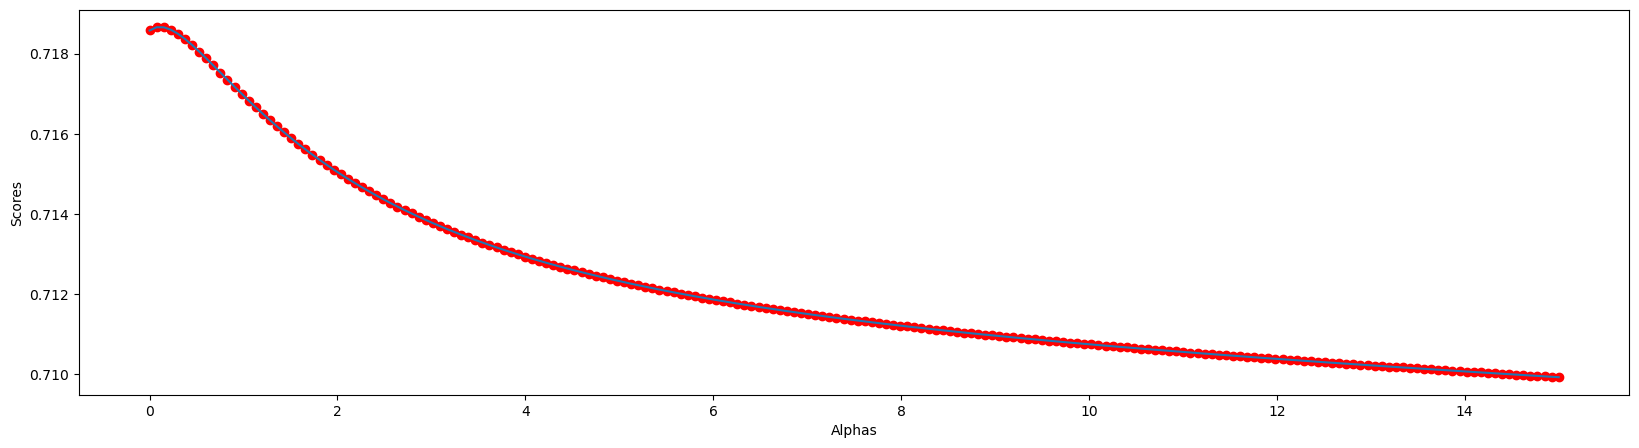

In [66]:
plt.figure(figsize=(20,5))
plt.plot(alphas,scores)
plt.scatter(alphas,scores,c='red')
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.show()

In [67]:
alphas = np.linspace(0.001,15,200)
scores=[]
for v in alphas:
    lasso = Lasso(alpha=v)
    scr = cross_val_score(lasso,X,y,cv=kfold)
    scores.append(np.mean(scr))
    #print("Alpha=",v,"R2 =",scr)

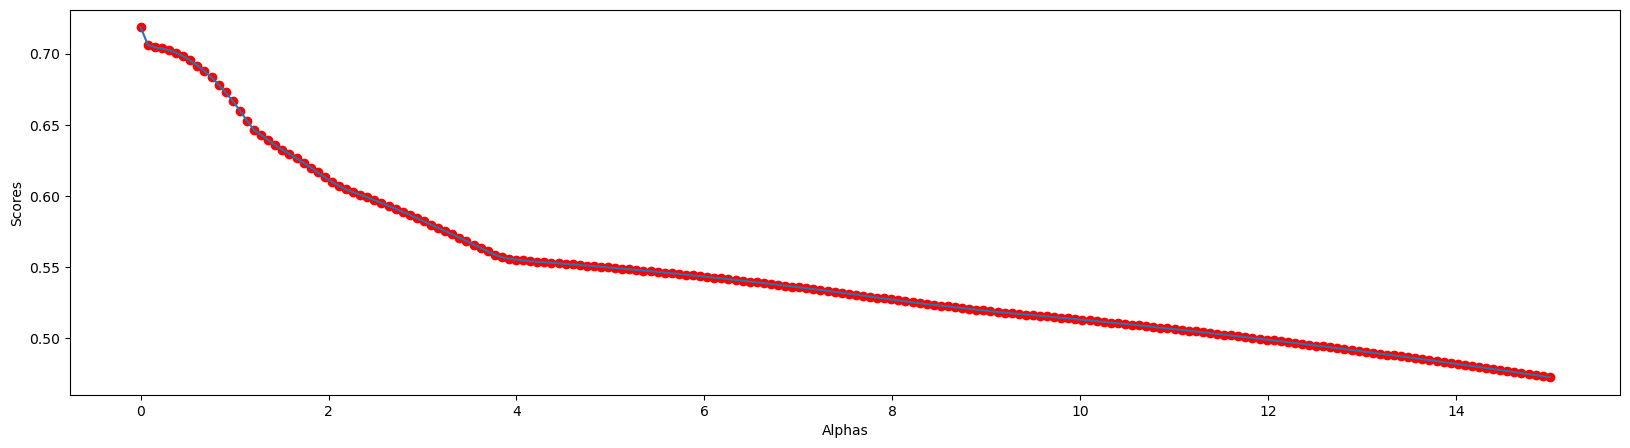

In [69]:
plt.figure(figsize=(20,5))
plt.plot(alphas,scores)
plt.scatter(alphas,scores,c='red')
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.show()

In [26]:
alphas = [0.001,0.1,0.5,1,2]
l1_s = [0.001, 0.25,0.75]
params = []
scores=[]
for v in alphas:
    for l1 in l1_s:
        elas = ElasticNet(alpha=v,l1_ratio=l1)
        scr = cross_val_score(elas,X,y,cv=kfold)
        scores.append(np.mean(scr))
        params.append({'alpha':v,'l1_ratio':l1})
        print("Alpha=",v,"R2 =",np.mean(scr))

Alpha= 0.001 R2 = 0.7183125085042489
Alpha= 0.001 R2 = 0.718475104009807
Alpha= 0.001 R2 = 0.7186442167639503
Alpha= 0.1 R2 = 0.7066051462899191
Alpha= 0.1 R2 = 0.7067805415626843
Alpha= 0.1 R2 = 0.7062913958198893
Alpha= 0.5 R2 = 0.6882659995387922
Alpha= 0.5 R2 = 0.6885697307607141
Alpha= 0.5 R2 = 0.692542155719803
Alpha= 1 R2 = 0.6748313076043034
Alpha= 1 R2 = 0.6730475774515327
Alpha= 1 R2 = 0.6692606160839133
Alpha= 2 R2 = 0.6582271747908262
Alpha= 2 R2 = 0.6516445940476384
Alpha= 2 R2 = 0.6265289567532337


In [27]:
i_max = np.argmax(scores)
print("Best Alpha:",alphas[i_max])
print("Best Scores:",scores[i_max])

Best Alpha: 0.5
Best Scores: 0.7186442167639503


In [32]:
param_values=[d['alpha'] for d in params]
print(len(param_values))
print(len(scores))

15
15


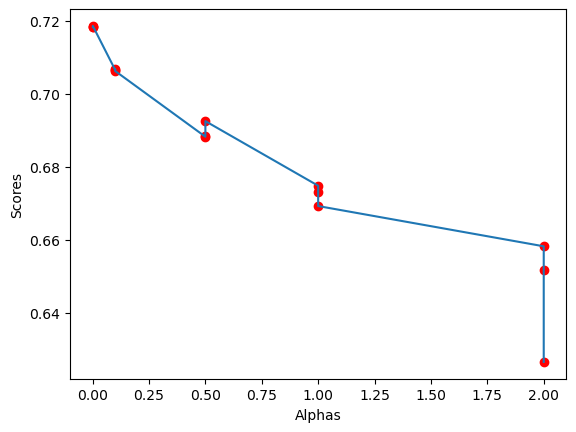

In [33]:
plt.plot(param_values,scores)
plt.scatter(param_values,scores,c='red')
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.show()